<h1 style="text-align:center;">LAB 1</h1>
<h1 style="text-align:center;">Spatial Domain Filtering</h1>
<h3 style="text-align:left; color:blue;">Student Name:</h3>
<h3 style="text-align:left; color:blue;">Student ID:</h3>

<h2 style="text-align:left; color:black;">Introduction</h2>

Spatial domain filtering is a fundamental technique used in image processing to modify or enhance images based on their pixel values in the spatial domain. Here pixels of the image are directly manipulated without transforming the image.

Spatial domain filters operate by convolving the image with a filter kernel or mask, which is a small matrix that defines the weights or coefficients for combining the pixel values. The filter kernel is typically a small square or rectangular matrix, with each element specifying the contribution of its corresponding pixel to the filtered result.

<h2 style="text-align:left; color:black;">Objective</h2>

In this lab, you'll be introduced to some python libraries commonly used for image processing which are:</br>
* OpenCV.</br>
* Numpy.</br>
* Matplotlib.</br>

You'll use these libraries to do some basic operations:</br>
* Reading a colored image from disk.</br>
* Checking the image properties (shape, datatype, and size).</br>
* Slicing an image.</br>
* Flipping an image.</br>
* Converting an image to grayscale.</br>
* Inspecting the separate BGR channels of an image.</br>

Then, you'll apply some spatial domain filtering techniques on some images to:</br>
* Smooth an image using averaging, gaussian and median filters.</br>
* Sharpen an image using Sobel and Laplacian filter.</br>
* Threshold an image and check its histogram.</br>
    

<h2 style="text-align:left; color:black;">Instructions</h2>

In [19]:
# Import the needed libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Basic Operations

In [2]:
# Read an image from disk
# flags: loads the image in the BGR 8-bit format
input_image = cv2.imread(filename="lenna.png", flags=cv2.IMREAD_COLOR)


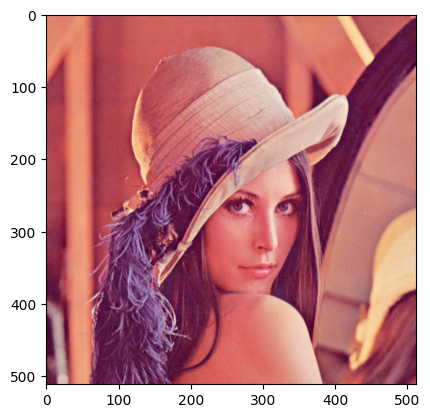

In [3]:
# Show an image using matplotlib
def show(image, colored = True):
    if colored:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
    else:
        plt.imshow(image, cmap="gray")
show(input_image)

In [4]:
# Print the array dimensions of the input image
print("BGR Image shape = ", input_image.shape)
# Print the data type of the input image
print("BGR Pixel type is ", input_image.dtype)
# Print the input image size in bytes
print("BGR Image size = ", input_image.size)

BGR Image shape =  (512, 512, 3)
BGR Pixel type is  uint8
BGR Image size =  786432


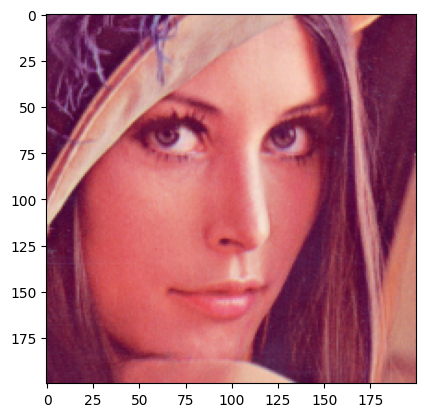

In [5]:
# Get part of the image (array slicing [start: end+1])
sliced_image = input_image[200:400, 200:400]
show(sliced_image)

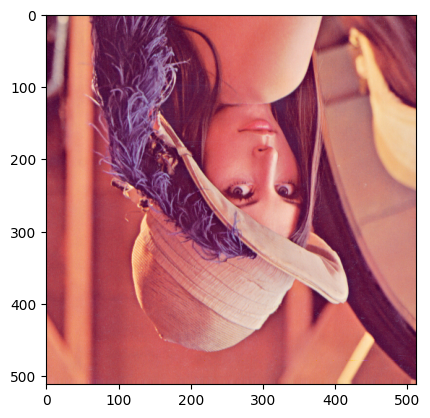

In [6]:
# Flip image: 0 for vertical flip, 1 for horizontal flip, -1 for both
flipped_vertically = cv2.flip(src=input_image, flipCode=0)
show(flipped_vertically)

Gray image shape =  (512, 512)


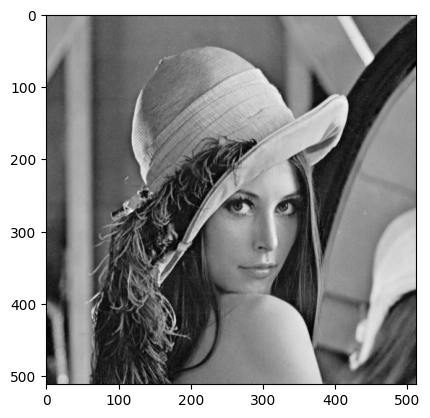

In [7]:
# Convert the BGR image to GRAYSCALE image and check its size
gray_image = cv2.cvtColor(src=input_image, code=cv2.COLOR_BGR2GRAY)
print("Gray image shape = ", gray_image.shape)
show(gray_image, False)

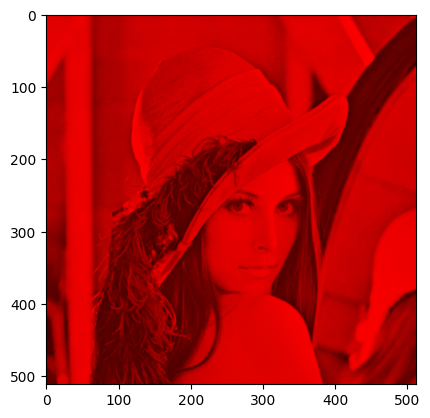

In [8]:
# Split B, G, R channels of input image
b, g, r = cv2.split(m=input_image)
# Display red channel only
zero = np.zeros(shape=b.shape, dtype=np.uint8)
red_channel = cv2.merge(mv=[zero, zero, r])
show(red_channel)

### Smoothing Filters

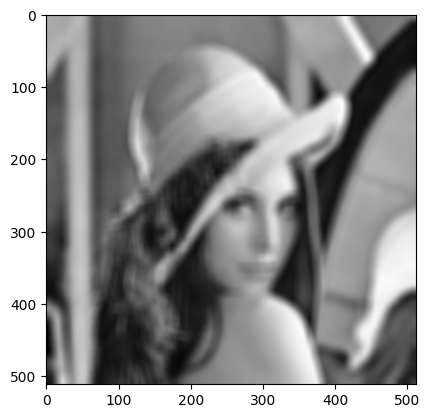

In [9]:
# Create customized averaging filter and apply it to the image
filter_length = 15
average_filter = np.ones(shape=(filter_length, filter_length), dtype=np.uint8) / ((filter_length) ** 2)
averaged_image = cv2.filter2D(src=gray_image, ddepth=-1, kernel=average_filter)
show(averaged_image, False)

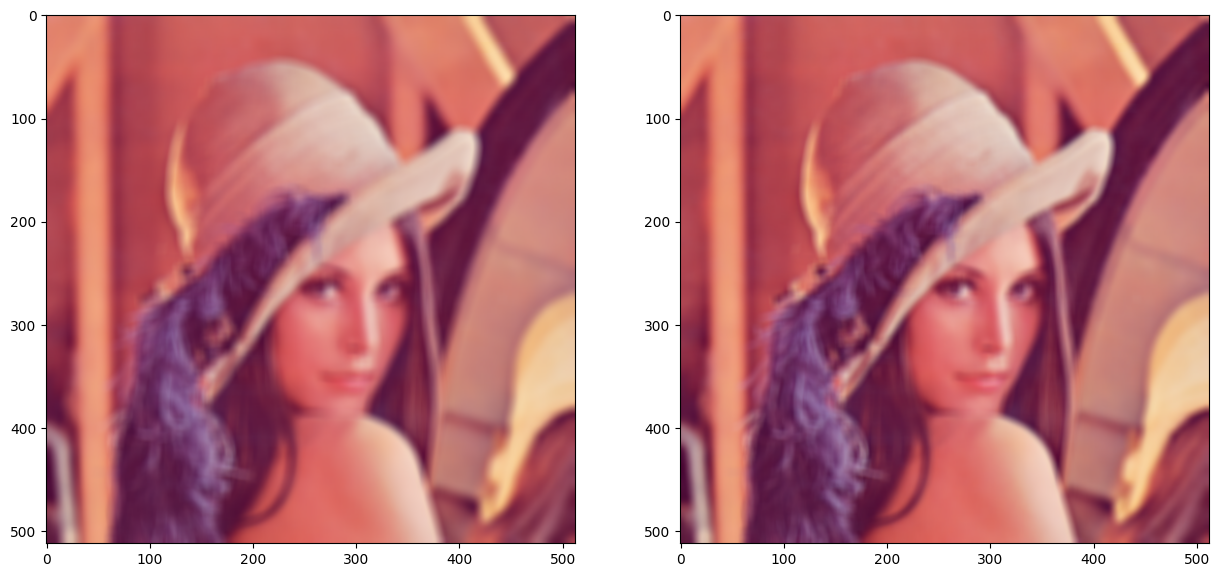

In [10]:
# Apply OpenCV averaging filters
blurred_image = cv2.blur(src=input_image, ksize=(11, 11)) # of the same datatype
box_filtered_image = cv2.boxFilter(src=input_image, ddepth=-1, ksize=(9,9))
plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1,2,1)
show(blurred_image)
plt.subplot(1,2,2)
show(box_filtered_image)

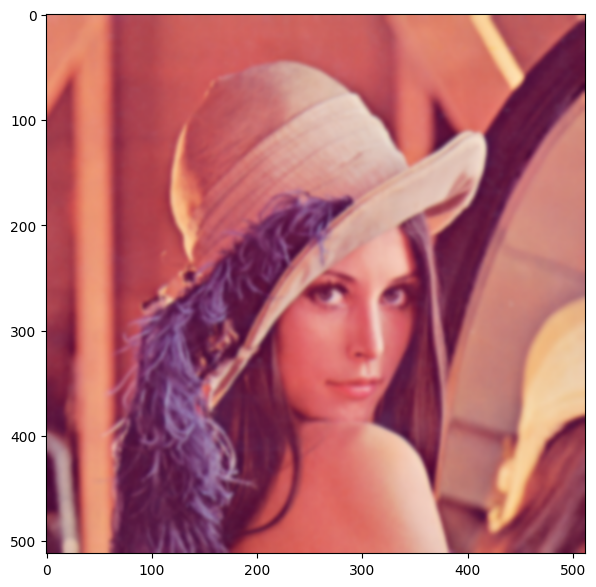

In [11]:
# Apply OpenCV Gaussian filter
gaussian_image = cv2.GaussianBlur(src=input_image, ksize=(9,9), sigmaX=0)  # sigmaY=sigmaX
plt.subplots(1, 1, figsize=(7, 7))
show(gaussian_image)

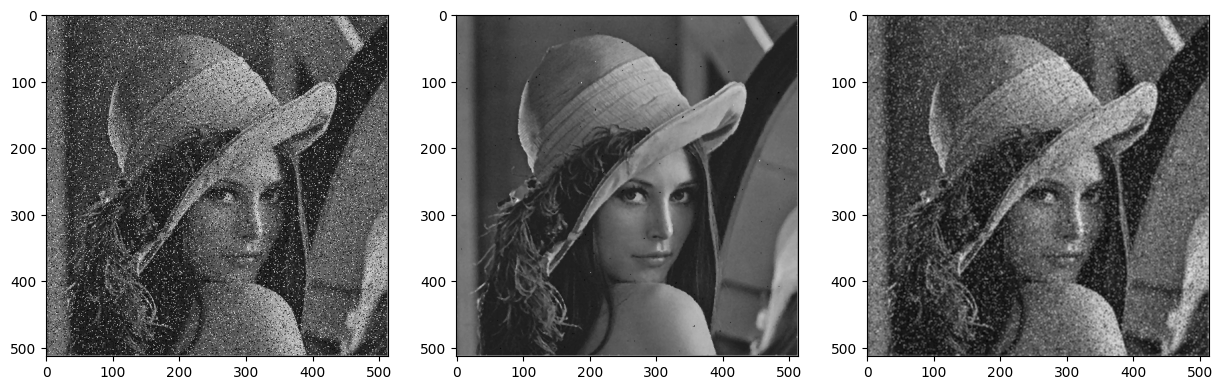

In [12]:
# Read an image corrupted with salt and pepper noise and apply median filter
salt_and_pepper_image = cv2.imread(filename="salt_and_pepper.png", flags=cv2.IMREAD_GRAYSCALE)
median_image = cv2.medianBlur(src=salt_and_pepper_image, ksize=3)
averaged_image_salt_pepper = cv2.blur(src=salt_and_pepper_image, ksize=(3,3))
plt.subplots(1, 3, figsize=(15, 15))
plt.subplot(1,3,1)
show(salt_and_pepper_image, False)
plt.subplot(1,3,2)
show(median_image, False)
plt.subplot(1,3,3)
show(averaged_image_salt_pepper, False)

### Sharpening Filters

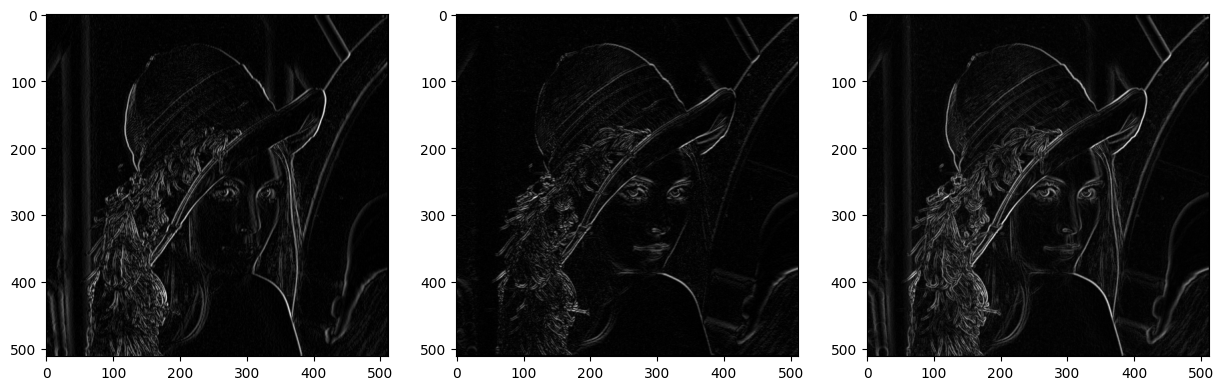

In [13]:
# Apply Sobel filter to detect edges in an image
sobel_x = cv2.Sobel(src=gray_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(src=gray_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel_approximate_mag = (np.absolute(sobel_x)+ np.absolute(sobel_y))
# Normalize the result to range 0 to 255
 # First parameters: input image
 # Second parameter: output image
sobel_x = cv2.normalize(np.absolute(sobel_x), None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)
sobel_y = cv2.normalize(np.absolute(sobel_y), None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)
sobel_approximate_mag = cv2.normalize(sobel_approximate_mag, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.subplots(1, 3, figsize=(15, 15))
plt.subplot(1,3,1)
show(sobel_x, False)
plt.subplot(1,3,2)
show(sobel_y, False)
plt.subplot(1,3,3)
show(sobel_approximate_mag, False)

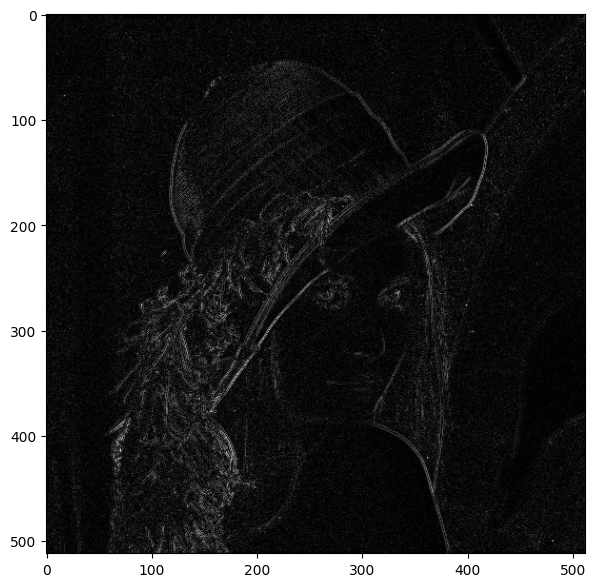

In [14]:
# Apply Laplacian filter to detect edges in an image
laplacian_image = cv2.Laplacian(src=gray_image, ddepth=cv2.CV_64F) # default ksize=1 apply the 3x3 laplacian filter
laplacian_image_abs = np.absolute(laplacian_image)
laplacian_image_abs = cv2.normalize(laplacian_image_abs, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.subplots(1, 1, figsize=(7, 7))
show(laplacian_image_abs, False)

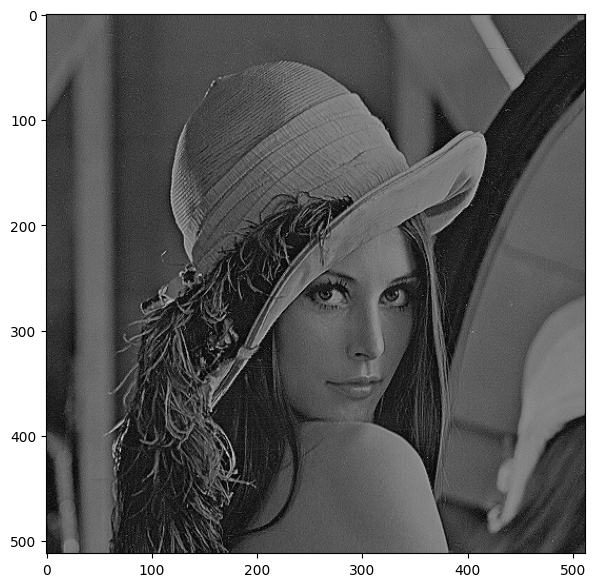

In [15]:
# Sharpening an image
sharpened_image = np.absolute(gray_image - laplacian_image)
sharpened_image = cv2.normalize(sharpened_image, None, 0, 255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.subplots(1, 1, figsize=(7, 7))
show(sharpened_image, False)

### Point Processing

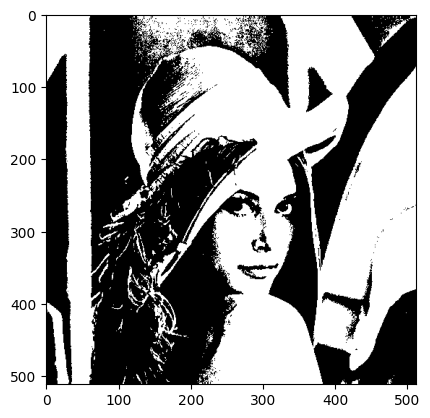

In [16]:
# Threshold an image
threshold, thresh_image = cv2.threshold(src=gray_image, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
show(thresh_image, False)

### Histogram

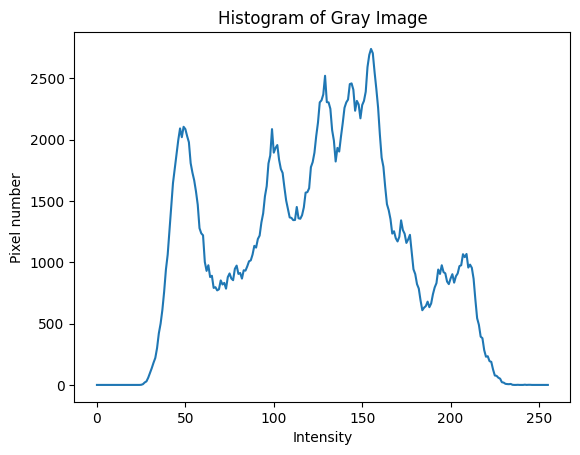

In [18]:
# Compute the histogram of an image
# mask is used to compute histogram for certain part of the image where the mask not equal zero, it is an array of same size as image
gray_image_histogram = cv2.calcHist(images=[gray_image], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(gray_image_histogram)
plt.xlabel("Intensity")
plt.ylabel("Pixel number")
plt.title("Histogram of Gray Image")
plt.show()